<a href="https://colab.research.google.com/github/hemil19/DeepLearning/blob/master/Assignment-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Base Model for cifar100

In [20]:
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

X_train=X_train.reshape((-1,32*32*3))
X_test=X_test.reshape((-1,32*32*3))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocess
X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [22]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 3072) (50000, 100)
(10000, 3072) (10000, 100)


In [23]:
##build model
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=3072,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               12500     
Total params: 443,316
Trainable params: 443,316
Non-trainable params: 0
_________________________________________________________________


In [24]:
##compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [25]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
#mc=tf.keras.callbacks.ModelCheckpoint(filepath='cifar10-{epoch:02d}.hdf5',monitor='val_acc', verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1407/1407 [==============================] - 6s 4ms/step - loss: 4.4763 - accuracy: 0.0322 - val_loss: 4.2666 - val_accuracy: 0.0534
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 4.0630 - accuracy: 0.0774 - val_loss: 4.0203 - val_accuracy: 0.0808
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.8611 - accuracy: 0.1082 - val_loss: 3.9047 - val_accuracy: 0.1086
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.7352 - accuracy: 0.1311 - val_loss: 3.7863 - val_accuracy: 0.1246
Epoch 5/20
1407/1407 [==============================] - 6s 5ms/step - loss: 3.6496 - accuracy: 0.1466 - val_loss: 3.7467 - val_accuracy: 0.1280
Epoch 6/20
1407/1407 [==============================] - 6s 5ms/step - loss: 3.5733 - accuracy: 0.1600 - val_loss: 3.6339 - val_accuracy: 0.1472
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 3.5093 - accuracy: 0.1739 - val_loss: 3.6596 - val_accuracy:

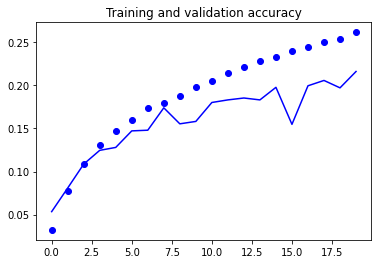

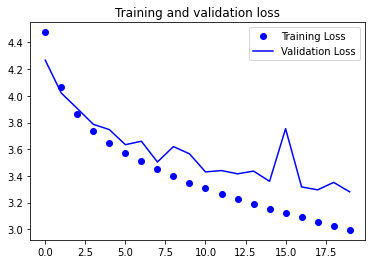

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Base Model for mnist

In [27]:
from tensorflow.keras.datasets import mnist

In [33]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape((-1,28*28))
X_test=X_test.reshape((-1,28*28))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocess
X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [35]:
X_train.shape,y_train.shape

((60000, 784), (60000, 10))

In [39]:
##build model
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=784,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1250      
Total params: 203,266
Trainable params: 203,266
Non-trainable params: 0
_________________________________________________________________


In [40]:
##compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [41]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
#mc=tf.keras.callbacks.ModelCheckpoint(filepath='cifar10-{epoch:02d}.hdf5',monitor='val_acc', verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7464 - accuracy: 0.7968 - val_loss: 0.2621 - val_accuracy: 0.9270
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.9162 - val_loss: 0.1914 - val_accuracy: 0.9465
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2221 - accuracy: 0.9335 - val_loss: 0.1613 - val_accuracy: 0.9552
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1847 - accuracy: 0.9451 - val_loss: 0.1482 - val_accuracy: 0.9588
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1566 - accuracy: 0.9534 - val_loss: 0.1335 - val_accuracy: 0.9628
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1359 - accuracy: 0.9594 - val_loss: 0.1271 - val_accuracy: 0.9640
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1198 - accuracy: 0.9644 - val_loss: 0.1058 - val_accuracy:

In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9723


[0.08939757198095322, 0.9722999930381775]

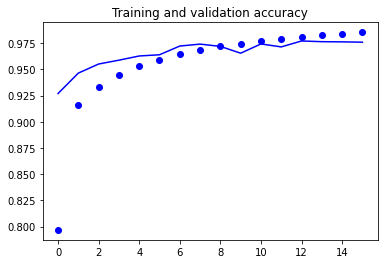

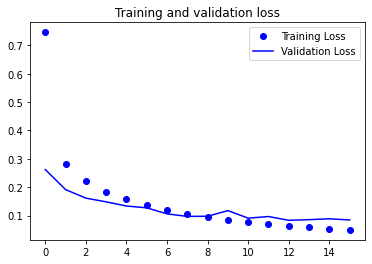

In [43]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Base Model for fashion-mnist

In [44]:
from tensorflow.keras.datasets import fashion_mnist

In [47]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape((-1,28*28))
X_test=X_test.reshape((-1,28*28))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocess
X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [48]:
##build model
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=784,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1250      
Total params: 203,266
Trainable params: 203,266
Non-trainable params: 0
_________________________________________________________________


In [49]:
##compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [50]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
#mc=tf.keras.callbacks.ModelCheckpoint(filepath='cifar10-{epoch:02d}.hdf5',monitor='val_acc', verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8351 - accuracy: 0.7591 - val_loss: 0.2756 - val_accuracy: 0.9178
Epoch 2/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2926 - accuracy: 0.9134 - val_loss: 0.1955 - val_accuracy: 0.9440
Epoch 3/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2266 - accuracy: 0.9331 - val_loss: 0.1635 - val_accuracy: 0.9527
Epoch 4/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1870 - accuracy: 0.9443 - val_loss: 0.1496 - val_accuracy: 0.9562
Epoch 5/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1574 - accuracy: 0.9529 - val_loss: 0.1260 - val_accuracy: 0.9625
Epoch 6/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1356 - accuracy: 0.9595 - val_loss: 0.1111 - val_accuracy: 0.9672
Epoch 7/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1189 - accuracy: 0.9642 - val_loss: 0.1221 - val_accuracy:

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9715


[0.09052832424640656, 0.9714999794960022]

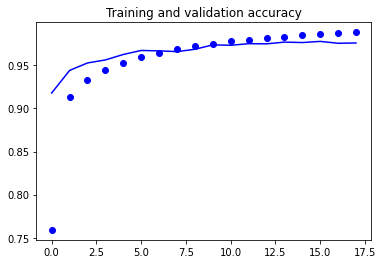

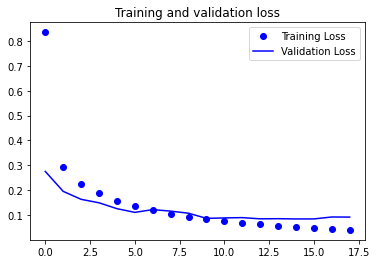

In [52]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()